# DeFi arbitrage

### Imports and data setup

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fetch import *
from one_inch_fetch import *
from arb import *
from constants import *

In [12]:
df_WETH = pd.DataFrame(columns=['# of arbitrage', 'total orders', '% of arbitrage'])
df_WBTC = df_WETH.copy()
df_BNB = df_WETH.copy()
df_MATIC = df_WETH.copy()
df_SHIBA = df_WETH.copy()
df_USDC = df_WETH.copy()
df_USDT = df_WETH.copy()
df_DAI = df_WETH.copy()

## Tokens Used: WETH, WBTC, BNB, MATC, SHIBA, USDC, USDT, DAI

### Use WETH to buy following tokens low in 1inch and sell high at 0x

In [27]:
%%time
df_WETH.loc['USDC'] = arb(WETH, USDC, ethereum, limit)
df_WETH.loc['USDT'] = arb(WETH, USDT, ethereum, limit)
df_WETH.loc['DAI'] = arb(WETH, DAI, ethereum, limit)
df_WETH.loc['BNB'] = arb(WETH, BNB, ethereum, limit)

CPU times: user 541 ms, sys: 54.7 ms, total: 596 ms
Wall time: 17.6 s


In [14]:
df_WETH

,# of arbitrage,total orders,% of arbitrage
USDC,16.0,499.0,0.032064
USDT,7.0,214.0,0.032710
DAI,10.0,90.0,0.111111
BNB,2.0,11.0,0.181818


### Use WBTC to buy following tokens low in 1inch and sell high at 0x

In [15]:
%%time
df_WBTC.loc['USDC'] = arb(WBTC, USDC, ethereum, limit)
df_WBTC.loc['BNB'] = arb(WBTC, BNB, ethereum, limit)

CPU times: user 252 ms, sys: 26.4 ms, total: 278 ms
Wall time: 8.22 s


In [16]:
df_WBTC

,# of arbitrage,total orders,% of arbitrage
USDC,3.0,173.0,0.017341
BNB,1.0,3.0,0.333333


### Use BNB to buy following tokens low in 1inch and sell high at 0x

In [40]:
%%time
df_BNB.loc['USDC'] = arb(BNB, USDC, ethereum, limit)
df_BNB.loc['USDT'] = arb(BNB, USDT, ethereum, limit)
df_BNB.loc['WETH'] = arb(BNB, WETH, ethereum, limit)

CPU times: user 317 ms, sys: 31.6 ms, total: 349 ms
Wall time: 10.3 s


In [41]:
df_BNB

,# of arbitrage,total orders,% of arbitrage
USDC,1.0,1.0,1.0
USDT,1.0,1.0,1.0
WETH,0.0,9.0,0.0


### Use MATIC to buy following tokens low in 1inch and sell high at 0x

In [31]:
%%time
df_MATIC.loc['USDC'] = arb(MATIC, USDC, ethereum, limit)

CPU times: user 98.1 ms, sys: 11.4 ms, total: 109 ms
Wall time: 3.43 s


In [32]:
df_MATIC

,# of arbitrage,total orders,% of arbitrage
USDC,0.0,19.0,0.0


### Use SHIBA to buy following tokens low in 1inch and sell high at 0x

In [29]:
%%time
df_SHIBA.loc['USDC'] = arb(SHIBA, USDC, ethereum, limit)

CPU times: user 115 ms, sys: 12.7 ms, total: 128 ms
Wall time: 4.2 s


In [20]:
df_SHIBA

,# of arbitrage,total orders,% of arbitrage
USDC,0.0,30.0,0.0


### Use USDC to buy following tokens low in 1inch and sell high at 0x

In [33]:
%%time
df_USDC.loc['WETH'] = arb(USDC, WETH, ethereum, limit)
df_USDC.loc['WBTC'] = arb(USDC, WBTC, ethereum, limit)
df_USDC.loc['BNB'] = arb(USDC, BNB, ethereum, limit)
df_USDC.loc['SHIBA'] = arb(USDC, SHIBA, ethereum, limit)

CPU times: user 433 ms, sys: 44.1 ms, total: 477 ms
Wall time: 15.7 s


In [34]:
df_USDC

,# of arbitrage,total orders,% of arbitrage
WETH,2.0,8.0,0.25
WBTC,0.0,4.0,0.00
BNB,1.0,5.0,0.20
SHIBA,0.0,475.0,0.00


### Use USDT to buy following tokens low in 1inch and sell high at 0x

In [39]:
%%time
df_USDT.loc['USDC'] = arb(USDT, USDC, ethereum, limit)
df_USDT.loc['BNB'] = arb(USDT, BNB, ethereum, limit)

CPU times: user 209 ms, sys: 22.3 ms, total: 231 ms
Wall time: 6.83 s


In [38]:
df_USDT

,# of arbitrage,total orders,% of arbitrage
USDC,2.0,7.0,0.285714
BNB,0.0,5.0,0.000000


### Use DAI to buy following tokens low in 1inch and sell high at 0x

In [35]:
%%time
df_DAI.loc['USDC'] = arb(DAI, USDC, ethereum, limit)
df_DAI.loc['BNB'] = arb(DAI, BNB, ethereum, limit)

CPU times: user 207 ms, sys: 26.5 ms, total: 234 ms
Wall time: 7.15 s


In [36]:
df_DAI

,# of arbitrage,total orders,% of arbitrage
USDC,0.0,3.0,0.00
BNB,1.0,4.0,0.25


(array([10.,  2.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

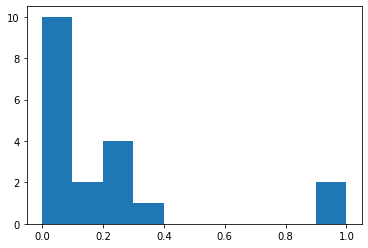

In [10]:
dist=[0.022000, 0.032558, 0.111111, 0.181818, 0.051429, 0.333333, 1.0, 1.0, 0.0, 0.05, 0.032258, 0.25, 0.00, 0.20, 0.00, 0.222222, 0.000000, 0.00, 0.25]
plt.subplot().hist(dist, bins=10)